In [2]:
import celerite
from celerite import terms


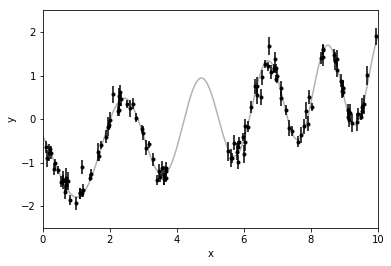

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

t = np.sort(np.append(
    np.random.uniform(0, 3.8, 57),
    np.random.uniform(5.5, 10, 68),
))  # The input coordinates must be sorted
yerr = np.random.uniform(0.08, 0.22, len(t))
y = 0.2 * (t-5) + np.sin(3*t + 0.1*(t-5)**2) + yerr * np.random.randn(len(t))

true_t = np.linspace(0, 10, 5000)
true_y = 0.2 * (true_t-5) + np.sin(3*true_t + 0.1*(true_t-5)**2)

plt.plot(true_t, true_y, "k", lw=1.5, alpha=0.3)
plt.errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 10)
plt.ylim(-2.5, 2.5);


In [9]:
print(t)

[0.07822108 0.13067638 0.17651157 0.22071773 0.24719605 0.33627151
 0.37115403 0.46374529 0.53007667 0.59277918 0.59287083 0.64799167
 0.69093488 0.69693714 0.70244693 0.75876037 0.80688862 0.98336393
 1.10667073 1.11014966 1.15612052 1.15753232 1.18450209 1.392175
 1.42325245 1.64139107 1.67257948 1.73306594 1.88167226 1.95409087
 1.97625848 1.99407444 2.07749906 2.25117536 2.27201992 2.27490224
 2.28423704 2.30867044 2.325041   2.51758468 2.6000855  2.6906758
 2.78157698 2.94550473 2.98366865 3.07190992 3.16328204 3.29146935
 3.40034393 3.45541753 3.50312209 3.57009598 3.60576504 3.61271436
 3.66940173 3.68442159 3.68565744 5.52484953 5.61438607 5.64143134
 5.7035228  5.78601258 5.83320093 5.8354779  5.84640959 5.98551142
 5.99523366 6.02141077 6.03817411 6.13415901 6.22549579 6.33956526
 6.38192288 6.39422057 6.52570823 6.52959174 6.62181503 6.72107064
 6.76420529 6.80388154 6.89942045 6.91460191 6.93101564 6.96332495
 6.96398649 6.98904111 7.10538997 7.11309578 7.2490478  7.3467231

In [5]:
# A non-periodic component
Q = 1.0 / np.sqrt(2.0)
w0 = 3.0
S0 = np.var(y) / (w0 * Q)
bounds = dict(log_S0=(-15, 15), log_Q=(-15, 15), log_omega0=(-15, 15))
kernel = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                       bounds=bounds)
kernel.freeze_parameter("log_Q")  # We don't want to fit for "Q" in this term

# A periodic component
Q = 1.0
w0 = 3.0
S0 = np.var(y) / (w0 * Q)
kernel += terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                        bounds=bounds)



In [6]:
gp = celerite.GP(kernel, mean=np.mean(y))
gp.compute(t, yerr)  # You always need to call compute once.
print("Initial log likelihood: {0}".format(gp.log_likelihood(y)))


Initial log likelihood: -6.75659638262951


In [7]:
print("parameter_dict:\n{0}\n".format(gp.get_parameter_dict()))
print("parameter_names:\n{0}\n".format(gp.get_parameter_names()))
print("parameter_vector:\n{0}\n".format(gp.get_parameter_vector()))
print("parameter_bounds:\n{0}\n".format(gp.get_parameter_bounds()))


parameter_dict:
OrderedDict([('kernel:terms[0]:log_S0', -0.8497786656258695), ('kernel:terms[0]:log_omega0', 1.0986122886681098), ('kernel:terms[1]:log_S0', -1.1963522559058422), ('kernel:terms[1]:log_Q', 0.0), ('kernel:terms[1]:log_omega0', 1.0986122886681098)])

parameter_names:
('kernel:terms[0]:log_S0', 'kernel:terms[0]:log_omega0', 'kernel:terms[1]:log_S0', 'kernel:terms[1]:log_Q', 'kernel:terms[1]:log_omega0')

parameter_vector:
[-0.84977867  1.09861229 -1.19635226  0.          1.09861229]

parameter_bounds:
[(-15, 15), (-15, 15), (-15, 15), (-15, 15), (-15, 15)]



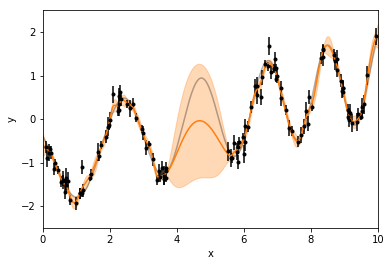

In [8]:
x = np.linspace(0, 10, 5000)
pred_mean, pred_var = gp.predict(y, x, return_var=True)
pred_std = np.sqrt(pred_var)

#Let’s plot this prediction and compare it to the true underlying function.

color = "#ff7f0e"
plt.plot(true_t, true_y, "k", lw=1.5, alpha=0.3)
plt.errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x, pred_mean, color=color)
plt.fill_between(x, pred_mean+pred_std, pred_mean-pred_std, color=color, alpha=0.3,
                 edgecolor="none")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 10)
plt.ylim(-2.5, 2.5);

